In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [3]:

def getRatings(fileName, ratingsDict):
    ratings  = pickle.load( open( fileName, "rb" ) )


    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict



def plotRatings(ratingsDict, criteria):
    scores = np.array(range(10))
    size = ratingsDict['maxIndex'] + 1
    img = np.zeros((size,size), dtype=np.float32)


    baseValueList = []
    for key, value in ratingsDict[criteria].items():
        x,y = key.split('_')   
        value = [np.sum(scores*np.array(v)) for v in value]

        if y == '0':
            baseValueList.append(value)
        x = int(x)
        y = int(y)
        if len(value) > 0:
            img[x, y] = sum(value)/len(value)

    baseValue = np.mean(baseValueList)

    mask = img == 0

    img[mask] = baseValue

    plt.figure()
    
    img = img + (5 - baseValue)

    plt.imshow(img, cmap='RdBu', vmin=0, vmax=10)
    plt.colorbar()

    plt.title(criteria)
    plt.ylabel('Repeat start layer')
    plt.xlabel('Repeat stop layer')
    return img, baseValueList   



def print_rating(img):
    print(f"Maximum Value for combined: {np.unravel_index(np.argmax(img), np.array(img).shape)}, with value: {np.max(img)}")

def topN(ratingsDict, n):
    scores = np.array(range(10))

    # Compute averages and store them with keys
    scores = np.array(range(10))
    averages = [(key, np.mean([np.sum(scores*np.array(v)) for v in values])) for key, values in ratingsDict.items()]

    print(f'{averages=}')

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=True)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def plotHistograms(ratingsDict1, criteria):
    scores = np.array(range(10))
    baseRatingList = []
    ratingList = []
    for key, value in ratingsDict1[criteria].items():
        ratingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] != '0'])
        baseRatingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] == '0'])
    plt.figure()

    print(f'{baseRatingList=}')
    print(len(baseRatingList))
    print(len(ratingList))

    plt.hist(ratingList, bins=100, edgecolor='black')
    plt.axvline(x=np.mean(baseRatingList), color='r', linestyle='--', linewidth=2)
    plt.axvline(x=np.mean(baseRatingList) - np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(baseRatingList) + np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{criteria} Ratings')
    plt.xlim(0, 10)

    plt.show()

def getStandardDeviation(ratingsDict, criteria):
    ratingList = []
    for l in ratingsDict[criteria].values():
        ratingList.append(np.std(l))

    return np.mean(ratingList)


def getAllRatings(fileName):
    ratingsDict = defaultdict(lambda: defaultdict(list))
    ratingsDict['maxIndex'] = 0
    for i in range(1,11):
        ratingsDict = getRatings(fileName.format(i), ratingsDict)

    craft, craftBaseValueList = plotRatings(ratingsDict, 'Craftsmanship')
    creat,  creatBaseValueList = plotRatings(ratingsDict, 'Creativity')
    consist, consistBaseValueList = plotRatings(ratingsDict, 'Consistency')

    plt.figure()

    combined = (craft + creat + consist)/3
    plt.imshow(combined, cmap='RdBu', vmin=0, vmax=10)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Combined Ratings')
    return ratingsDict


def plotAllHistograms(ratingsDict):
    plotHistograms(ratingsDict, 'Craftsmanship')
    plotHistograms(ratingsDict, 'Creativity')
    plotHistograms(ratingsDict, 'Consistency')
    

# TinyLlama

baseRatingList=[5.19667178203963, 0.72027693228722, 4.092302822997681, 5.205195649527923, 4.898133292209877, 4.577495291885498, 5.566156852728454, 3.7824886630702395, 5.280265616218458, 5.599212901423016, 3.4423316449432377, 0.5170630295083356, 5.287445090688379, 4.750950952191488, 5.422162071249659, 5.513408969476586, 5.340268730287789, 5.379549835204671, 5.2182678806782405, 5.316660503342064, 5.073830846945839, 3.265301665465813, 5.361004420596146, 5.647838696004328, 5.45775883462602, 6.294498169115286, 5.502583505331131, 4.314832591554477, 5.399992207589094, 3.7684682963347313, 5.644547243978423, 3.2432715745835594, 6.176515654057084, 4.679802505677799, 5.566826890819925, 5.934632751786921, 4.01907400177879, 2.293001933487176, 5.374874186753004, 5.804881758719603, 5.44201971340226, 4.852063557453221, 5.953836230163688, 4.874158829208227, 5.6376684206334176, 5.238628253056959, 5.279440170814723, 4.298945181506497, 5.368451004644157, 5.431711363024078, 2.0827763553920704, 5.1342795999

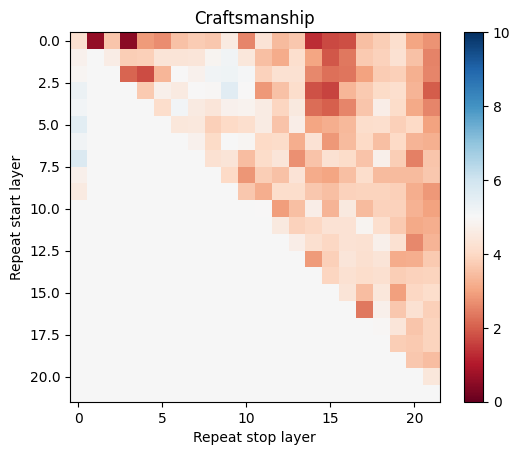

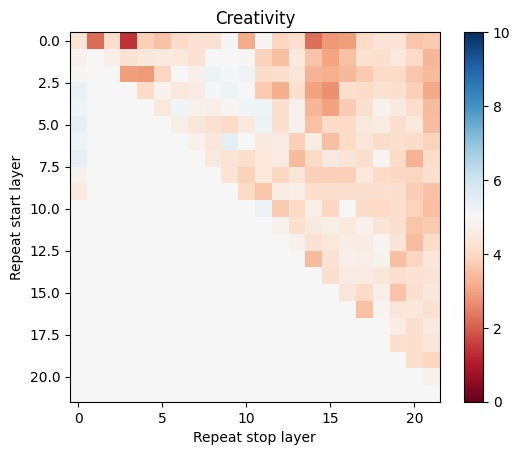

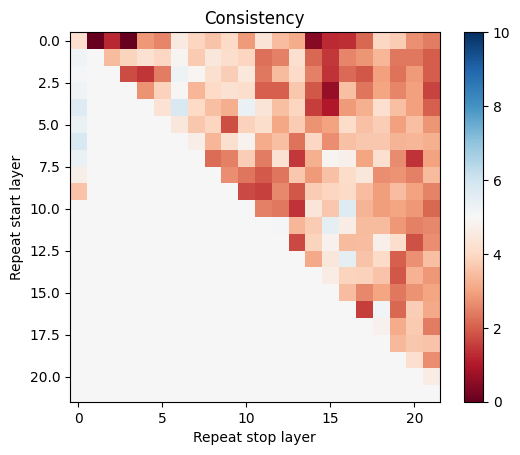

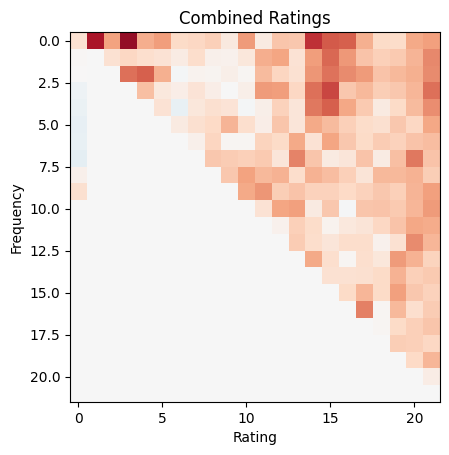

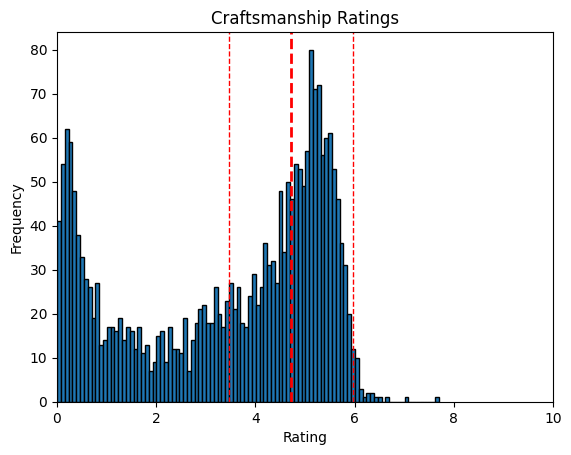

baseRatingList=[3.185738151221983, 1.1749455945851253, 3.434242241377831, 4.077780055188896, 4.216160392830545, 4.4631409835928935, 4.752427981709843, 4.123640410055486, 4.097909536266911, 3.635998146685097, 1.6312924467317202, 0.8657180027748836, 4.110505302205638, 3.6912587807703403, 4.940551440456147, 4.838037511148286, 4.721193867555712, 4.558253890281549, 4.609019445632725, 4.306057521981074, 3.934015208646997, 3.166964195490891, 4.16912052744749, 5.210080143307096, 4.573555118450713, 5.893494121766452, 4.816848397269268, 3.8369491819007138, 3.9757221811485124, 2.5547410823844245, 4.398150695320055, 3.213392650839296, 4.736011049508988, 4.131595310747457, 5.04704134743497, 5.40644494112712, 3.1069230319233156, 2.1284268368274297, 4.095089768787631, 4.824215014674337, 4.2007408976546685, 2.977957886873128, 4.67171939056243, 4.099348032755643, 4.780868708960952, 4.88067048157518, 4.540242650750088, 3.3296631545995012, 4.337727268930848, 4.914578428350069, 1.7879060584489679, 4.36523

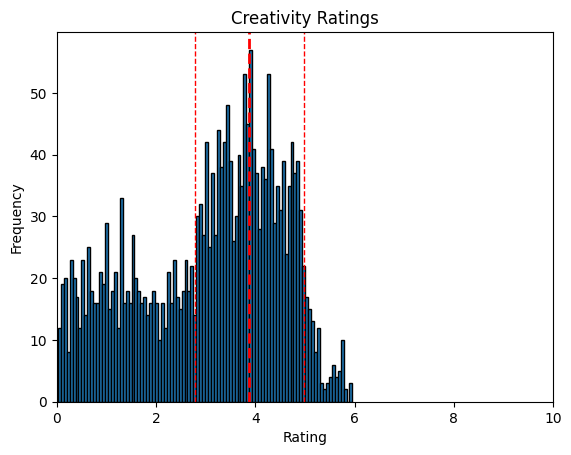

baseRatingList=[2.5557597945862653, 0.6447498361186135, 6.3316800432712625, 6.946989840662354, 6.538816874188342, 6.4821581032356335, 6.792360437946627, 2.966657971018549, 7.082875472210617, 7.0440009571029805, 1.9912030504530946, 0.23937176323192944, 6.742614015568051, 1.9781821611104533, 6.88597619653649, 7.322706531947006, 6.968948556732357, 6.542624663954484, 6.775350319399081, 6.973355622131294, 3.7737643595392, 1.8081517131067812, 6.695937201679044, 7.5549467353139335, 7.085127257582144, 7.711456010454867, 7.3802196016028745, 3.6460329697342786, 1.5788535551982932, 6.175572156906128, 7.033299469661415, 4.9749840735894395, 7.712205385870902, 3.7810546178370714, 6.966107697361792, 7.65926084368698, 5.543129133991897, 0.9846578751644302, 6.678581171952828, 6.921653568185548, 3.2693067472428083, 2.2990791324664315, 6.981844638527036, 6.848411562223191, 6.6450562894460745, 5.956173759936064, 7.029050831288259, 3.9101025637246494, 5.145711280405521, 7.006906637328029, 0.464345177486961

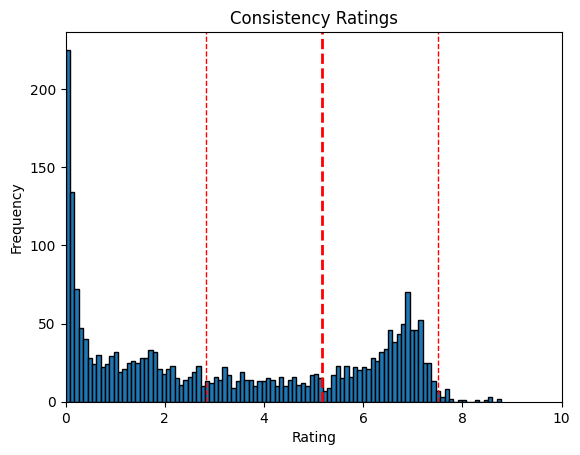

averages=[('1_0', 4.515541087608129), ('2_0', 4.562677659939093), ('3_0', 4.854255365083099), ('4_0', 4.935988432871173), ('5_0', 5.00673610225026), ('6_0', 4.977506984406072), ('7_0', 5.078004767273279), ('8_0', 4.344576868288039), ('9_0', 3.80726287326272), ('0_0', 3.821601030148594), ('0_1', 0.5192786075583089), ('0_2', 2.5897200770034186), ('1_2', 3.8353600519063966), ('0_3', 0.1846674169853098), ('1_3', 3.570786557771335), ('2_3', 1.8331071291851526), ('0_4', 2.7652078585820243), ('1_4', 3.7523572316325176), ('2_4', 1.5883113355182512), ('3_4', 3.0961336925357226), ('0_5', 2.5060629079594063), ('1_5', 3.875726177583124), ('2_5', 2.830510941366923), ('3_5', 4.064796433003339), ('4_5', 3.877414663663006), ('0_6', 3.6405508348635114), ('1_6', 4.168469836627469), ('2_6', 4.678090738358751), ('3_6', 4.249627483148884), ('4_6', 4.9457016574255155), ('5_6', 4.126119353766508), ('0_7', 3.563412977192503), ('1_7', 3.717085227806563), ('2_7', 4.410790837327469), ('3_7', 3.9023832011693327),

In [7]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{}_Ratings_Mixtral_instruct.p'
                        # TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_1_Ratings_Mistral_mistral_instruct

tinyMixtral = getAllRatings(fileName)

plotAllHistograms(tinyMixtral)


combined_dict = {}
for key in tinyMixtral['Craftsmanship']:
    combined_dict[key] = tinyMixtral['Craftsmanship'][key] + tinyMixtral['Creativity'][key] + tinyMixtral['Consistency'][key]
topN(combined_dict, 10)

# Mistral

In [6]:
mistralMixtral

defaultdict(<function __main__.getAllRatings.<locals>.<lambda>()>,
            {'maxIndex': 31,
             'Craftsmanship': defaultdict(list,
                         {'0_0': [array([3.68093606e-06, 2.91186007e-06, 9.92795594e-06, 1.01055215e-04,
                                  1.47343928e-03, 4.17353846e-02, 3.71983439e-01, 4.55763608e-01,
                                  1.28554031e-01, 3.72543785e-04], dtype=float32),
                           array([5.6966119e-06, 1.9996990e-06, 7.7257519e-06, 3.2215341e-04,
                                  5.0788512e-03, 1.3620317e-01, 6.7041546e-01, 1.7217693e-01,
                                  1.5766662e-02, 2.1331485e-05], dtype=float32),
                           array([3.9270581e-06, 2.0373307e-06, 5.8265309e-06, 1.0655612e-04,
                                  2.3690262e-03, 6.0150754e-02, 4.8814085e-01, 3.6275548e-01,
                                  8.6161979e-02, 3.0355013e-04], dtype=float32),
                           array

baseRatingList=[6.668927647579039, 6.056371699495003, 6.470724461099735, 6.411691395014429, 6.006583072177364, 6.546035486097367, 6.407482329039567, 6.320191719635659, 6.101658021921594, 6.469581656829291, 6.512313007384591, 5.371189519101108, 5.897102120136196, 6.377796856688178, 6.586160209562081, 6.196492719987418, 5.7072828244995435, 4.22956348417938, 6.298297911690042, 6.429204033613473, 6.481121625812307, 6.432473661381209, 6.001420704802058, 6.557994750957732, 6.339422154064096, 6.416542118557572, 5.329596021576435, 6.135441979248753, 6.433947361542778, 5.40527168285189, 6.341323167656697, 6.126990039501834, 5.579961376435676, 7.320051368711177, 6.214414476996353, 6.33180662183986, 5.564503768425766, 5.871639433995142, 6.254622893457167, 5.95066340804442, 6.288325076993942, 6.698638487225708, 5.671368569855986, 6.6553646065156045, 5.5029066594515825, 5.730911527990884, 5.596064056624527, 5.0879558248925605, 5.305178521617563, 5.4628617665084676, 7.562055464133209, 5.704436824716

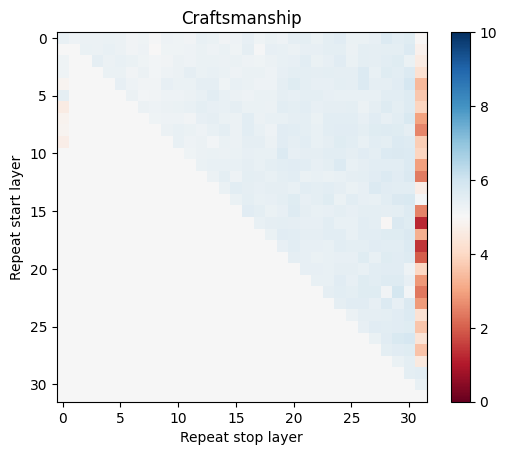

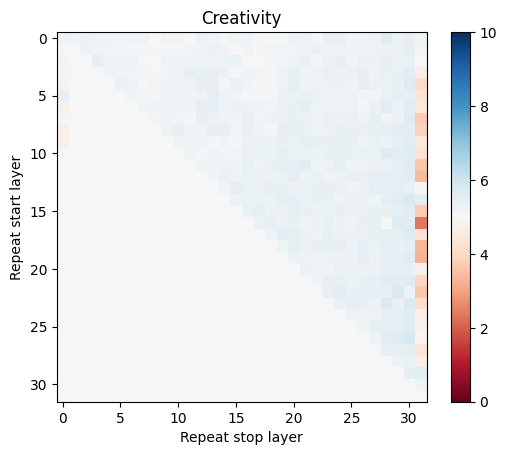

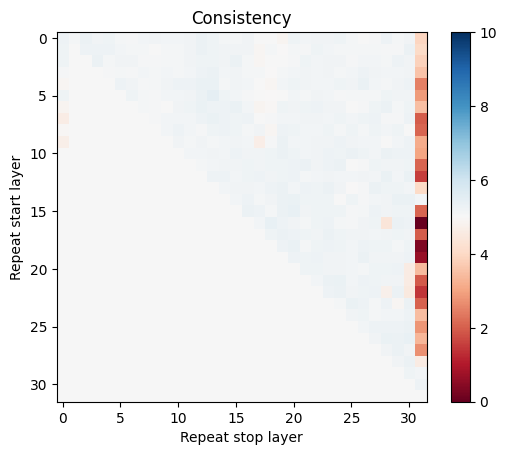

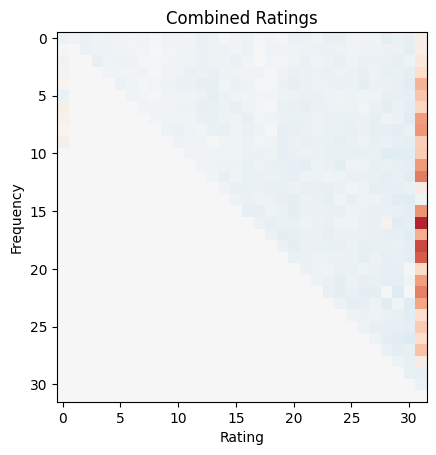

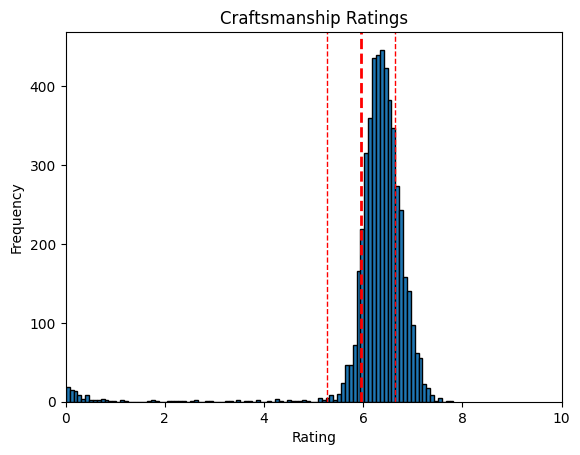

baseRatingList=[5.358590902011429, 5.053012077535186, 5.421471561366275, 5.422847682554334, 5.115306133552167, 5.456735128913579, 5.719023252399467, 5.940754153332364, 5.035619030447151, 5.071936386922403, 4.946298854090173, 4.703169228126171, 4.977452954358341, 5.45820363985672, 5.714448699397877, 5.241154073470625, 5.42938263801102, 4.812672028816451, 5.276473210515405, 5.195948335454148, 4.853395302147419, 5.7186319023123815, 5.00485996792645, 5.502997349449515, 5.227982102390115, 5.485299205280171, 4.875487840661663, 5.634560557411078, 5.532035814347751, 4.662012036266788, 4.879417942161581, 5.380397106389523, 4.951817622495582, 5.5779385399689545, 4.567184812218329, 6.070122368652477, 5.177403510140721, 5.389117575770342, 5.176456404070677, 4.96096621941922, 5.0831741027791395, 5.346768536469426, 4.996165872982601, 5.430606635149047, 4.613778842598549, 5.04098475586693, 4.695487894199687, 4.8739445476931, 4.703300754361408, 4.350454282390274, 5.491846259240901, 5.157625710982757, 

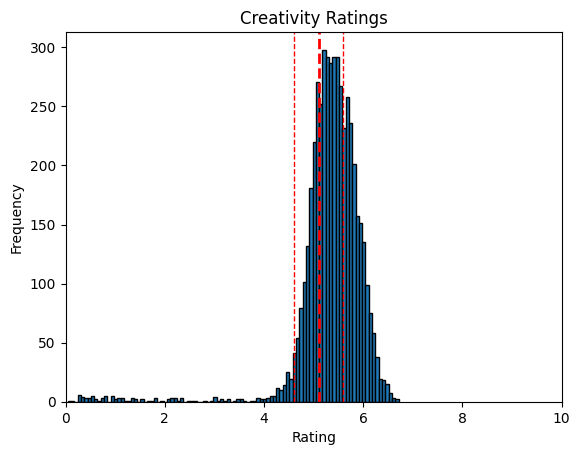

baseRatingList=[8.098904446821308, 7.581225786195944, 8.049272846209533, 7.799942240408939, 7.623612876857635, 7.754171300132128, 8.123600551325595, 8.106792412669165, 7.674914550886456, 7.832383102572976, 7.980364167686162, 7.047014483250678, 8.090149136863516, 8.14894233976554, 7.993558767863149, 7.9493850467417815, 8.336002596271328, 6.530312151182443, 7.795727407677305, 8.477611838845576, 7.9245002800756765, 8.059132840170605, 7.7241710364723986, 7.989041215216275, 7.683856391371307, 7.744436532171221, 7.492977460950897, 7.6247647492346005, 7.888046105301839, 8.38715300167678, 7.744764315734358, 7.82055843367894, 7.553502764785662, 8.057977906796168, 7.391282004229652, 7.529490452995788, 7.716040254615109, 7.445141701726243, 7.760739635785512, 7.683860519646032, 7.640372573598825, 8.069650140561862, 7.76191263991268, 7.968890404853028, 7.1442107168932125, 7.821452583262385, 7.2137372257263905, 7.303393968963064, 6.7967222420847975, 7.69096700685958, 7.996887612592758, 7.33728216278

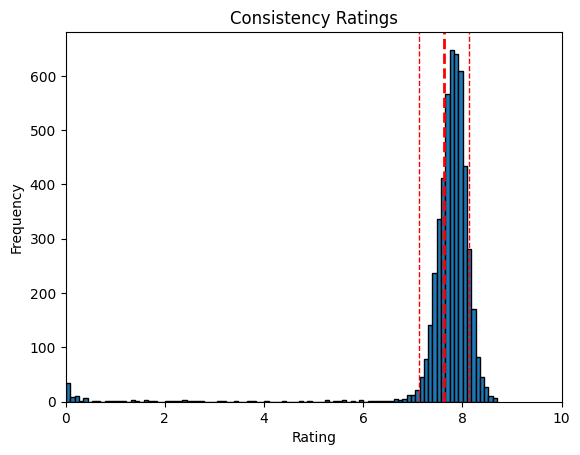

averages=[('0_0', 6.523312130400103), ('0_1', 6.387354895642613), ('0_2', 6.514225699279412), ('1_2', 6.518228767115009), ('0_3', 6.438073528481407), ('1_3', 6.46983964639085), ('2_3', 6.615141489903717), ('0_4', 6.472288497832888), ('1_4', 6.46864972488171), ('2_4', 6.443331485777507), ('3_4', 6.427280034683614), ('0_5', 6.403885067281001), ('1_5', 6.410377618377343), ('2_5', 6.487000433304342), ('3_5', 6.4251423022558045), ('4_5', 6.539661771206183), ('0_6', 6.352194812188632), ('1_6', 6.354168884660891), ('2_6', 6.480014258237276), ('3_6', 6.350121050388362), ('4_6', 6.437439630458275), ('5_6', 6.458783842918452), ('0_7', 6.400901077223547), ('1_7', 6.364334597019716), ('2_7', 6.337973628885264), ('3_7', 6.416512660404409), ('4_7', 6.306167915709136), ('5_7', 6.350447011744953), ('6_7', 6.427508590006948), ('0_8', 6.312210510715777), ('1_8', 6.193057174040977), ('2_8', 6.293557466551873), ('3_8', 6.318687357936523), ('4_8', 6.361890147306823), ('5_8', 6.334354616375203), ('6_8', 6.3

In [5]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Mistral-7B-Instruct-v0.2-stories_{}_Ratings_Mixtral_instruct.p'
#                       Mistral-7B-Instruct-v0.2-stories_1_Ratings_Mixtral_instruct
                      # Mistral-7B-Instruct-v0.2-stories_1 _Ratings_Mistral_mistral_instruct
mistralMixtral = getAllRatings(fileName)

plotAllHistograms(mistralMixtral)


combined_dict = {}
for key in mistralMixtral['Craftsmanship']:
    combined_dict[key] = mistralMixtral['Craftsmanship'][key] + mistralMixtral['Creativity'][key] + mistralMixtral['Consistency'][key]
topN(combined_dict, 5)

# Review Mistral

## Baseline
Solid but short answer.

## Top 5 keys with their averages for Craftsmanship:
Key: 10_29, Average: 5.762960147857666
Solid, slightly more personality than the base model

Key: 10_19, Average: 5.752908515930176
Also great

Key: 5_29, Average: 5.696372842788696
even better!

Key: 20_29, Average: 5.670412302017212
Key: 13_28, Average: 5.664324855804443


## Top 5 keys with their averages for Creativity:
Key: 10_29, Average: 5.119102191925049
Key: 13_28, Average: 5.098078012466431
Key: 8_28, Average: 5.098076820373535
Key: 1_29, Average: 5.0922736644744875
Excellent!

Key: 19_29, Average: 5.088565683364868


## Top 5 keys with their averages for Consistency:
Key: 10_19, Average: 5.599330902099609
Good clear text. no issues


Key: 12_21, Average: 5.5969030380249025
Key: 3_26, Average: 5.593423223495483
Key: 10_29, Average: 5.582774114608765
Key: 2_24, Average: 5.562200546264648

# Nous Capybara

baseRatingList=[6.613262870365844, 5.840686954950684, 6.464984161756547, 6.165699260625388, 6.6756091839197325, 6.867418886337191, 6.63579275860468, 6.344359111692938, 6.033496705033031, 6.357616243818711, 7.052093303524998, 5.980605326471959, 6.552854207366181, 6.67109723746313, 6.843621868555374, 6.721483435661867, 7.107009185883726, 6.666919716004941, 6.565939258252797, 6.474748014560419, 6.719925599257124, 6.248185368448503, 6.386796056627645, 6.933658191444806, 6.650386776383016, 5.986439272551706, 6.891021587116029, 6.227789624066872, 6.363176466144182, 6.565855232654712, 6.712405363559554, 6.109978944251907, 6.210293984074269, 7.112736936059491, 6.298382140140802, 6.923214614732387, 7.129379473247468, 6.188771281220056, 6.233676694777159, 6.817843363930933, 6.315876911862475, 5.847846790788026, 6.675794761066072, 6.609915665006156, 6.404142422644782, 6.171975587015652, 7.134020402251508, 6.354318517590855, 6.469043318712465, 6.939395546726701, 7.210184589356686, 5.74735236477704

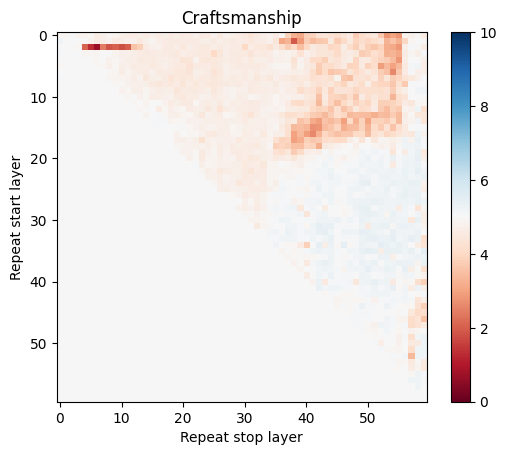

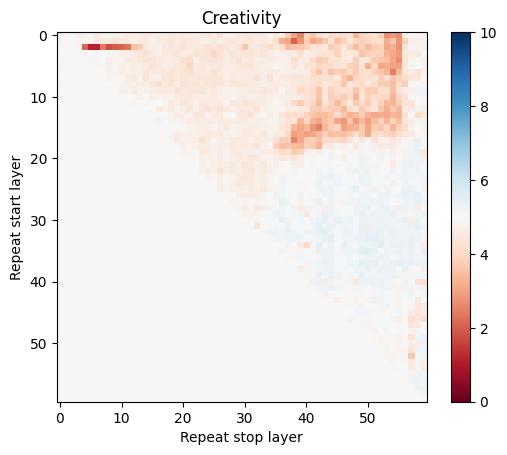

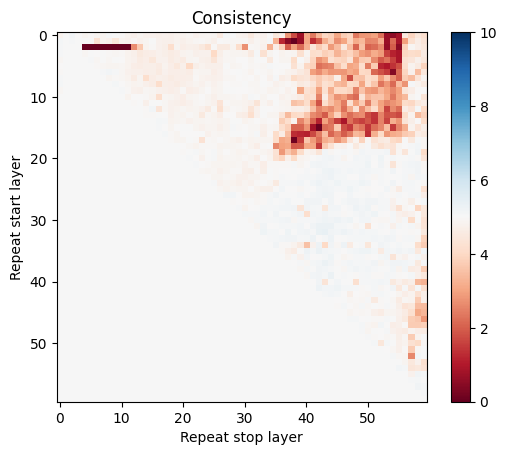

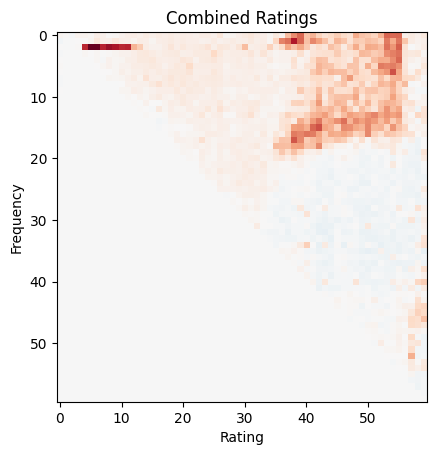

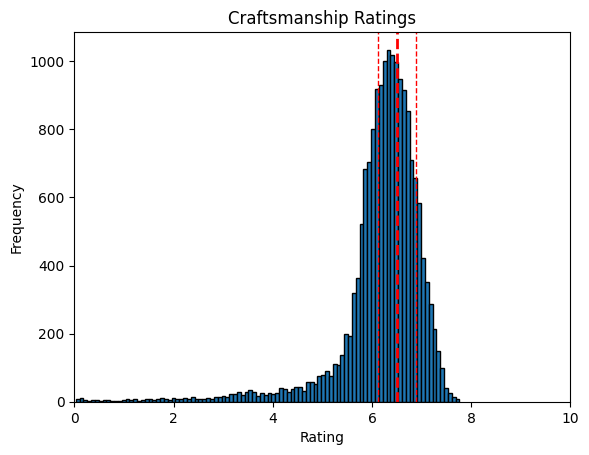

baseRatingList=[5.085521741056766, 4.871789165684731, 5.564689319421404, 5.415333233948218, 6.1935730142272405, 5.898156486098372, 5.926026168647468, 6.083022514743561, 5.296584592775162, 5.154507600323086, 5.4802929783475065, 4.79393026692469, 6.48896140212355, 5.843437872365257, 6.4255332482819085, 5.8427233818633795, 6.34645404139917, 6.3481915068049375, 5.315335043364939, 5.8678526604908825, 5.31883750398174, 5.366539519231537, 5.703767556961566, 6.181807572468301, 5.426727163263422, 5.374331130790324, 5.775240761578061, 5.932330377693006, 5.307322982948108, 5.73373150973606, 5.336430307202249, 5.007167196664341, 5.788754477101406, 6.429721492359363, 6.211087021034018, 5.916354685905844, 6.4365668346432585, 5.410188828016544, 5.1832585394593025, 5.694671755823379, 5.094360491443467, 4.876877783759028, 5.849212372880231, 6.265810877169201, 5.626370253242385, 5.188829129733335, 6.6494282969416645, 6.233060224278802, 5.743198006166722, 6.46024205346248, 5.675312106872411, 4.6263220078

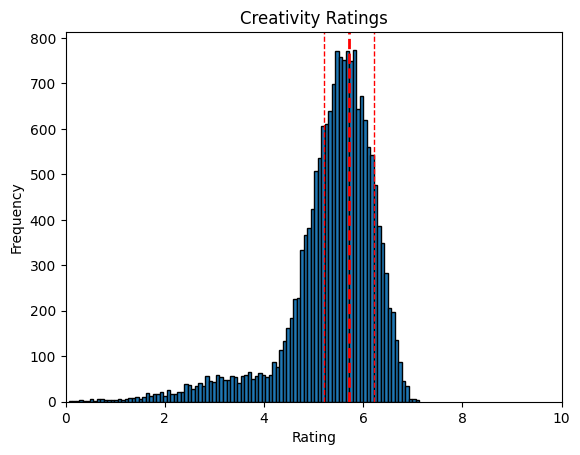

baseRatingList=[7.479442770838631, 7.241620339516999, 7.666986461992337, 7.678565740175259, 8.053708427655579, 7.649112135289812, 8.078902893597444, 7.959787740683623, 7.193011550871233, 8.068150582512203, 8.17810004785548, 7.331129868303833, 7.950468635641528, 8.192670990784748, 8.069287143833208, 7.700638777835138, 8.389814126431204, 8.193542587856427, 7.764414705509012, 7.874602257373326, 8.093614313160288, 7.697518052602618, 7.683272769809264, 8.33620665861693, 7.579688105674393, 7.729141865191195, 8.245316489273208, 8.185783004906853, 7.770222293349889, 7.899659705912896, 7.973163644378133, 7.448830664518937, 7.8598527186570095, 8.481113284569034, 7.632870931114326, 7.825033804402267, 8.428776141332783, 8.039047577326755, 7.760401410190497, 7.899496175419955, 7.948492642867194, 7.580694257205778, 7.883109134298223, 7.732667803405548, 7.733482250059637, 7.133215385588301, 8.433266245197586, 7.775510188036719, 7.740484986600222, 7.879662458338771, 8.401865205494175, 7.27485503205923

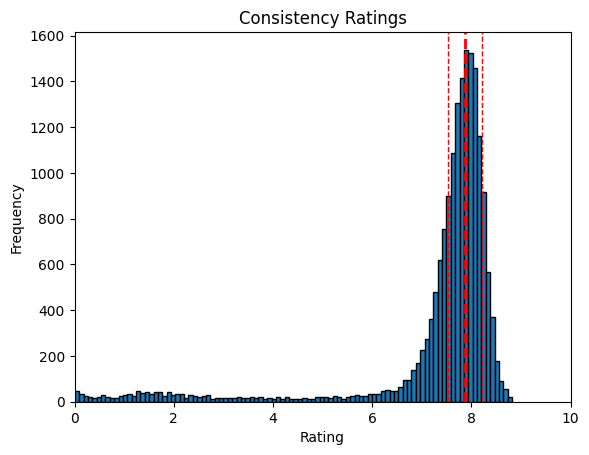

averages=[('0_0', 6.551913953905463), ('0_1', 6.635087828918344), ('0_2', 6.801954932851651), ('1_2', 6.726241668639246), ('0_3', 6.523853152994753), ('1_3', 6.657815881808603), ('2_3', 6.633176369029815), ('0_4', 6.523343496811095), ('1_4', 6.681413335610364), ('2_4', 2.9200008991963182), ('3_4', 6.5896594638694665), ('0_5', 6.605758107463219), ('1_5', 6.576509841547708), ('2_5', 1.6914346987251991), ('3_5', 6.684618102902137), ('4_5', 6.695205730433164), ('0_6', 6.363066653098828), ('1_6', 6.154259294895057), ('2_6', 1.4722008468043908), ('3_6', 6.599817902442891), ('4_6', 6.58243934594321), ('5_6', 6.676272088894925), ('0_7', 6.42579877747362), ('1_7', 6.388271624294802), ('2_7', 2.8356881253346558), ('3_7', 6.711598085446727), ('4_7', 6.734388760696604), ('5_7', 6.602077718503068), ('6_7', 6.6866154013419346), ('0_8', 6.623269414710948), ('1_8', 6.402983020168457), ('2_8', 2.3702420428530186), ('3_8', 6.632086482194618), ('4_8', 6.48833744571362), ('5_8', 6.473726669041231), ('6_8'

In [4]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Nous-Capybara-34B-4.0bpw-stories_{}_Ratings_Mixtral_instruct.p'
                      # Mistral-7B-Instruct-v0.2-stories_1 _Ratings_Mistral_mistral_instruct
nousMixtral = getAllRatings(fileName)

plotAllHistograms(nousMixtral)


combined_dict = {}
for key in nousMixtral['Craftsmanship']:
    combined_dict[key] = nousMixtral['Craftsmanship'][key] + nousMixtral['Creativity'][key] + nousMixtral['Consistency'][key]
topN(combined_dict, 5)


In [19]:
def compareHistograms(ratingsDict1, ratingsDict2, ratingsDict3, criteria, legend):

    
    ratingList1 = []
    for l in ratingsDict1[criteria].values():
        ratingList1.extend(l)

    ratingList2 = []
    for l in ratingsDict2[criteria].values():
        ratingList2.extend(l)
    
    ratingList3 = []
    for l in ratingsDict3[criteria].values():
        ratingList3.extend(l)

    scores = np.array(range(10))
    ratingList1 = [np.sum(scores*np.array(v)) for v in ratingList1]
    ratingList2 = [np.sum(scores*np.array(v)) for v in ratingList2]
    ratingList3 = [np.sum(scores*np.array(v)) for v in ratingList3]

    print(f'{ratingList1=}')
    print(f'{ratingList2=}')
    print(f'{ratingList3=}')

    plt.figure()
    plt.title(f'{criteria} Ratings')
    plt.hist([ratingList1, ratingList2, ratingList3],histtype='bar', bins=30, edgecolor='black', density=True)
    plt.legend(legend)


ratingList1=[5.19667178203963, 0.72027693228722, 4.092302822997681, 5.205195649527923, 4.898133292209877, 4.577495291885498, 5.566156852728454, 3.7824886630702395, 5.280265616218458, 5.599212901423016, 3.4423316449432377, 0.5170630295083356, 5.287445090688379, 4.750950952191488, 5.422162071249659, 5.513408969476586, 5.340268730287789, 5.379549835204671, 5.2182678806782405, 5.316660503342064, 5.073830846945839, 3.265301665465813, 5.361004420596146, 5.647838696004328, 5.45775883462602, 6.294498169115286, 5.502583505331131, 4.314832591554477, 5.399992207589094, 3.7684682963347313, 5.644547243978423, 3.2432715745835594, 6.176515654057084, 4.679802505677799, 5.566826890819925, 5.934632751786921, 4.01907400177879, 2.293001933487176, 5.374874186753004, 5.804881758719603, 5.44201971340226, 4.852063557453221, 5.953836230163688, 4.874158829208227, 5.6376684206334176, 5.238628253056959, 5.279440170814723, 4.298945181506497, 5.368451004644157, 5.431711363024078, 2.0827763553920704, 5.1342795999844

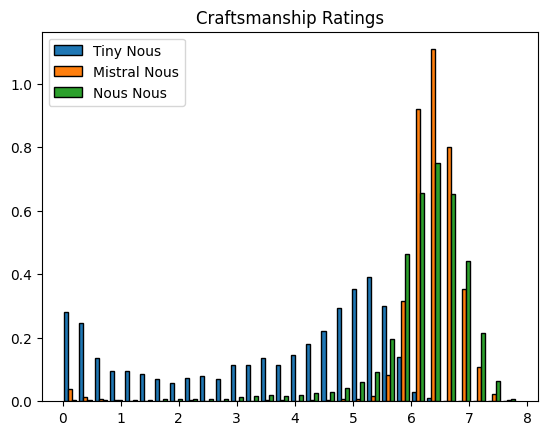

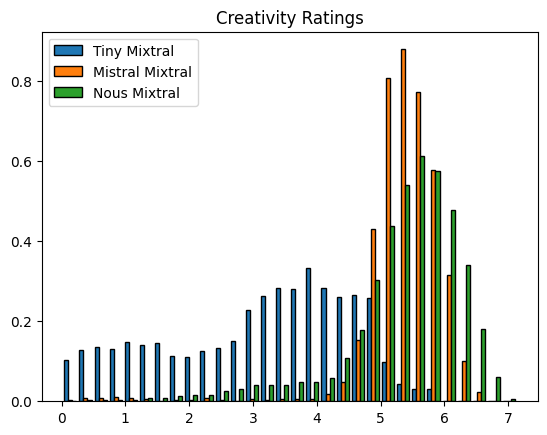

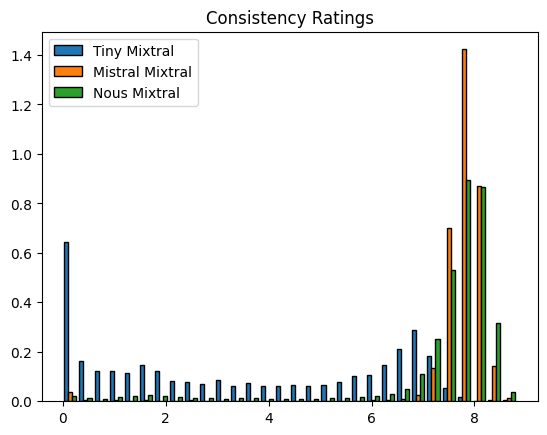

In [20]:
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])

ratingList1=[5.002463115731669, 4.309442446849023, 5.006926863280647, 5.893154491169678, 5.117336847975122, 5.106659757296357, 5.166188459387572, 5.317986668120431, 5.004372772626654, 5.063594260426739, 3.811000977935071, 4.999734441890251, 5.065041602533483, 5.129959527940236, 5.079081772292383, 6.660363560950405, 5.121007110855647, 5.770606464359376, 5.0635562345003455, 5.1158927419725275, 5.473141031622291, 4.665929725460889, 5.067362154484243, 6.117494223817541, 5.928763757284351, 6.383071394335234, 5.619062137273531, 4.999804183940153, 5.6674543436667335, 4.925187155082424, 5.954951979074858, 5.0444298416712865, 5.924458389423444, 4.963221581321954, 5.639730365618767, 5.929447373668475, 5.088942219636572, 5.074408577859671, 5.0551971031255025, 5.356276841697702, 5.024083942584118, 7.108845422912729, 5.343129501155561, 5.767477985121663, 5.413456421108754, 5.768900701696277, 5.594375785159519, 4.843452105599938, 5.10858265709069, 5.551433575242796, 4.941431751408309, 5.568909963167

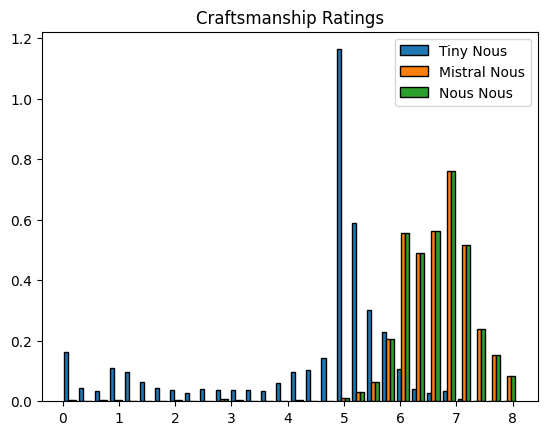

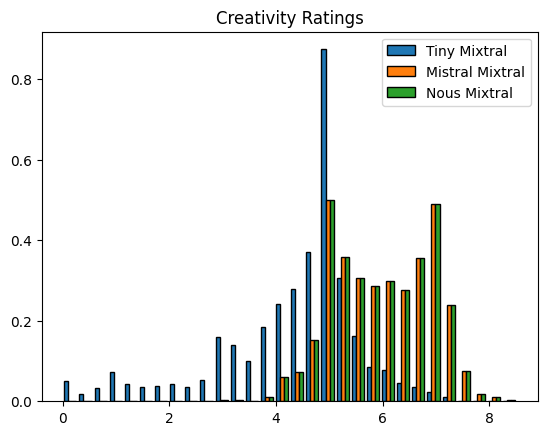

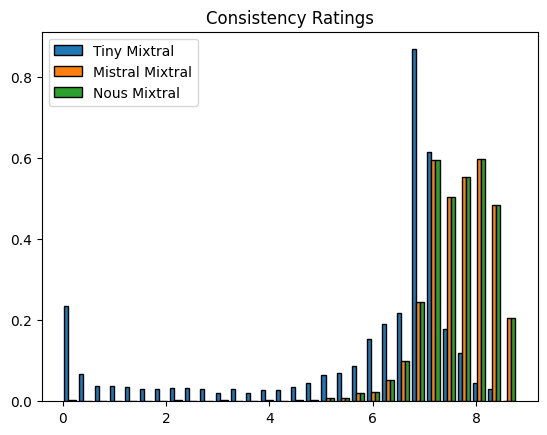

In [ ]:
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])